In [3]:
import cv2

mask_path ="C:/sample_ex3000/filtered_defect/train/masksreal/RGB_cell_cylindrical_0001_010.png"
mask = cv2.imread(mask_path)

if mask is None:
    print("üö® ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º ÌôïÏù∏ÌïòÏÑ∏Ïöî!")
else:
    print("‚úÖ ÌååÏùºÏùÑ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Î∂àÎü¨ÏôîÏäµÎãàÎã§. shape:", mask.shape)


‚úÖ ÌååÏùºÏùÑ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Î∂àÎü¨ÏôîÏäµÎãàÎã§. shape: (224, 224, 3)


C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

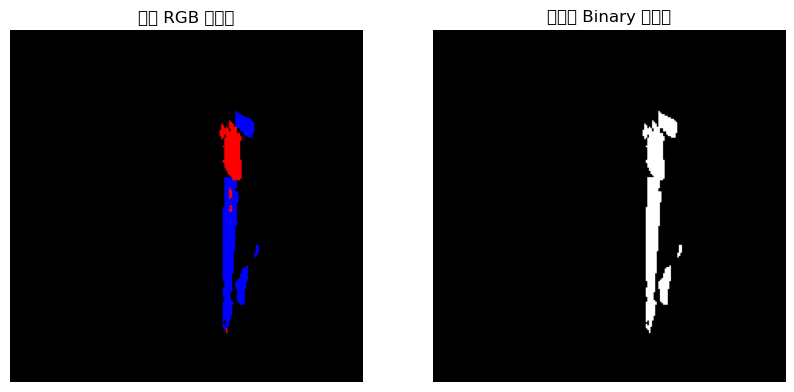

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ÎßàÏä§ÌÅ¨ Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
mask_path = "C:/sample_ex3000/filtered_defect/train/masksreal/RGB_cell_cylindrical_0001_010.png"
mask = cv2.imread(mask_path)  # (H, W, 3) RGB
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)  # OpenCVÎäî Í∏∞Î≥∏ BGRÏù¥ÎØÄÎ°ú RGBÎ°ú Î≥ÄÌôò

# Îπ®Í∞ï+ÌååÎûë Î∂ÄÎ∂ÑÏùÑ Ìù∞ÏÉâ(255)ÏúºÎ°ú ÎßåÎì§Í∏∞
gray_mask = np.zeros(mask.shape[:2], dtype=np.uint8)  # Îπà ÎßàÏä§ÌÅ¨ (H, W)

# Îπ®Í∞ï(255, 0, 0) ÎòêÎäî ÌååÎûë(0, 0, 255)Ïù¥ ÏûàÎäî Î∂ÄÎ∂ÑÏùÑ Ìù∞ÏÉâ(255)ÏúºÎ°ú Î≥ÄÍ≤Ω
red_blue_mask = (mask[:, :, 0] > 100) | (mask[:, :, 2] > 100)  # R or B > 100Ïù¥Î©¥ Î∂àÎüâ
gray_mask[red_blue_mask] = 255  # Ìù∞ÏÉâ (Î∂àÎüâ)

# Í≤∞Í≥º ÌôïÏù∏
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask)
plt.title("ÏõêÎ≥∏ RGB ÎßàÏä§ÌÅ¨")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_mask, cmap="gray")
plt.title("Î≥ÄÌôòÎêú Binary ÎßàÏä§ÌÅ¨")
plt.axis("off")

plt.show()


In [5]:
import os
import cv2
import numpy as np

# ÏõêÎ≥∏ ÎßàÏä§ÌÅ¨ Ìè¥ÎçîÏôÄ Î≥ÄÌôòÎêú ÎßàÏä§ÌÅ¨ Ï†ÄÏû• Ìè¥Îçî ÏÑ§Ï†ï
mask_dir = "C:/sample_ex3000/filtered_defect/train/masksreal/"
output_dir = "C:/sample_ex3000/filtered_defect/train/masks_binary/"

# Ï†ÄÏû•Ìï† Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏÉùÏÑ±
os.makedirs(output_dir, exist_ok=True)

# Î™®Îì† ÌååÏùº Î≥ÄÌôò
for mask_file in os.listdir(mask_dir):
    mask_path = os.path.join(mask_dir, mask_file)
    
    # ÎßàÏä§ÌÅ¨ Î∂àÎü¨Ïò§Í∏∞
    mask = cv2.imread(mask_path)
    
    if mask is None:
        print(f"ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ Ïã§Ìå®: {mask_file}")
        continue
    
    # RGB ‚Üí Binary Î≥ÄÌôò
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    binary_mask = np.zeros(mask.shape[:2], dtype=np.uint8)  # Îπà ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±

    # Îπ®Í∞ï + ÌååÎûëÏùÑ Ìù∞ÏÉâ(255)ÏúºÎ°ú Î≥ÄÌôò
    binary_mask[(mask[:, :, 0] > 100) | (mask[:, :, 2] > 100)] = 255  # R > 100 ÎòêÎäî B > 100Ïù¥Î©¥ Î∂àÎüâ
    
    # Î≥ÄÌôòÎêú ÎßàÏä§ÌÅ¨ Ï†ÄÏû•
    save_path = os.path.join(output_dir, mask_file)
    cv2.imwrite(save_path, binary_mask)

print("Î™®Îì† ÎßàÏä§ÌÅ¨ Î≥ÄÌôò ÏôÑÎ£å!")

Î™®Îì† ÎßàÏä§ÌÅ¨ Î≥ÄÌôò ÏôÑÎ£å!


In [6]:
import os
import cv2
import numpy as np

# ÏõêÎ≥∏ ÎßàÏä§ÌÅ¨ Ìè¥ÎçîÏôÄ Î≥ÄÌôòÎêú ÎßàÏä§ÌÅ¨ Ï†ÄÏû• Ìè¥Îçî ÏÑ§Ï†ï
mask_dirs = {
    "val": "C:/sample_ex3000/filtered_defect/val/masksreal/",
    "test": "C:/sample_ex3000/filtered_defect/test/masksreal/"
}

output_dirs = {
    "val": "C:/sample_ex3000/filtered_defect/val/masks_binary/",
    "test": "C:/sample_ex3000/filtered_defect/test/masks_binary/"
}

# Ï†ÄÏû•Ìï† Ìè¥Îçî ÏÉùÏÑ±
for folder in output_dirs.values():
    os.makedirs(folder, exist_ok=True)

# Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖã(train, val, test)Ïóê ÎåÄÌï¥ Î≥ÄÌôò ÏàòÌñâ
for dataset, mask_dir in mask_dirs.items():
    output_dir = output_dirs[dataset]
    
    print(f"{dataset} Îç∞Ïù¥ÌÑ∞ÏÖã ÎßàÏä§ÌÅ¨ Î≥ÄÌôò Ï§ë...")

    for mask_file in os.listdir(mask_dir):
        mask_path = os.path.join(mask_dir, mask_file)
        
        # ÎßàÏä§ÌÅ¨ Î∂àÎü¨Ïò§Í∏∞
        mask = cv2.imread(mask_path)
        
        if mask is None:
            print(f"ÌååÏùº Î∂àÎü¨Ïò§Í∏∞ Ïã§Ìå®: {mask_file}")
            continue
        
        # RGB ‚Üí Binary Î≥ÄÌôò
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        binary_mask = np.zeros(mask.shape[:2], dtype=np.uint8)  # Îπà ÎßàÏä§ÌÅ¨ ÏÉùÏÑ±

        # Îπ®Í∞ï + ÌååÎûëÏùÑ Ìù∞ÏÉâ(255)ÏúºÎ°ú Î≥ÄÌôò
        binary_mask[(mask[:, :, 0] > 100) | (mask[:, :, 2] > 100)] = 255  # R > 100 ÎòêÎäî B > 100Ïù¥Î©¥ Î∂àÎüâ
        
        # Î≥ÄÌôòÎêú ÎßàÏä§ÌÅ¨ Ï†ÄÏû•
        save_path = os.path.join(output_dir, mask_file)
        cv2.imwrite(save_path, binary_mask)

    print(f" {dataset} Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò ÏôÑÎ£å!")

print("Î™®Îì† ÎßàÏä§ÌÅ¨ Î≥ÄÌôò ÏôÑÎ£å!")


val Îç∞Ïù¥ÌÑ∞ÏÖã ÎßàÏä§ÌÅ¨ Î≥ÄÌôò Ï§ë...
 val Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò ÏôÑÎ£å!
test Îç∞Ïù¥ÌÑ∞ÏÖã ÎßàÏä§ÌÅ¨ Î≥ÄÌôò Ï§ë...
 test Îç∞Ïù¥ÌÑ∞ÏÖã Î≥ÄÌôò ÏôÑÎ£å!
Î™®Îì† ÎßàÏä§ÌÅ¨ Î≥ÄÌôò ÏôÑÎ£å!


In [15]:
import numpy as np
import tensorflow as tf
import cv2
import os
from glob import glob

# Í≤ΩÎ°ú ÏÑ§Ï†ï (ÏÇ¨Ïö©ÏûêÍ∞Ä ÏßÄÏ†ïÌïú Ìè¥Îçî)
image_dir = {
    "train": "C:/sample_ex3000/filtered_defect/train/images/",
    "val": "C:/sample_ex3000/filtered_defect/val/images/",
    "test": "C:/sample_ex3000/filtered_defect/test/images/"
}

mask_dir = {
    "train": "C:/sample_ex3000/filtered_defect/train/masks_binary/",
    "val": "C:/sample_ex3000/filtered_defect/val/masks_binary/",
    "test": "C:/sample_ex3000/filtered_defect/test/masks_binary/"
}

# Ïù¥ÎØ∏ÏßÄ & ÎßàÏä§ÌÅ¨ Î°úÎìú Ìï®Ïàò
def load_images_masks(image_path, mask_path):
    image = cv2.imread(image_path)  # BGR Î°úÎìú
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # RGB Î≥ÄÌôò
    image = cv2.resize(image, (224, 224))  # ÌÅ¨Í∏∞ Ï°∞Ï†ï

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # ÌùëÎ∞± ÎßàÏä§ÌÅ¨ Î°úÎìú
    mask = cv2.resize(mask, (224, 224))  # ÌÅ¨Í∏∞ Ï°∞Ï†ï
    mask = (mask > 0).astype(np.uint8)  # Ïù¥ÏßÑÌôî (0,1)

    return image, mask

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
def load_dataset(image_folder, mask_folder):
    image_paths = sorted(glob(os.path.join(image_folder, "*.png")))
    mask_paths = sorted(glob(os.path.join(mask_folder, "*.png")))

    images, masks = [], []
    for img_path, msk_path in zip(image_paths, mask_paths):
        img, msk = load_images_masks(img_path, msk_path)
        images.append(img)
        masks.append(msk)

    return np.array(images), np.array(masks)

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
X_train, Y_train = load_dataset(image_dir["train"], mask_dir["train"])
X_val, Y_val = load_dataset(image_dir["val"], mask_dir["val"])
X_test, Y_test = load_dataset(image_dir["test"], mask_dir["test"])

# Ï∞®Ïõê ÌôïÏù∏ (H, W, C)
print(" X_train:", X_train.shape, "Y_train:", Y_train.shape)
print(" X_val:", X_val.shape, "Y_val:", Y_val.shape)
print(" X_test:", X_test.shape, "Y_test:", Y_test.shape)

 X_train: (1587, 224, 224, 3) Y_train: (1587, 224, 224)
 X_val: (225, 224, 224, 3) Y_val: (225, 224, 224)
 X_test: (188, 224, 224, 3) Y_test: (188, 224, 224)


In [16]:
# Ï†ïÍ∑úÌôî ÏàòÌñâ
X_train = X_train.astype(np.float32) / 255.0
X_val = X_val.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

# ÎßàÏä§ÌÅ¨Îäî 0,1 Í∞í Ïú†ÏßÄ
Y_train = np.expand_dims(Y_train, axis=-1)  # (H, W) ‚Üí (H, W, 1)
Y_val = np.expand_dims(Y_val, axis=-1)
Y_test = np.expand_dims(Y_test, axis=-1)

# Î≥ÄÌôò ÌõÑ ÌôïÏù∏
print(" X_train Î≤îÏúÑ:", np.min(X_train), "to", np.max(X_train))
print(" Y_train Í≥†Ïú†Í∞í:", np.unique(Y_train))  # [0, 1]Ïù¥Î©¥ Ï†ïÏÉÅ


 X_train Î≤îÏúÑ: 0.0 to 1.0
 Y_train Í≥†Ïú†Í∞í: [0 1]


In [17]:
import tensorflow as tf

# TensorFlow Dataset Î≥ÄÌôò
def create_tf_dataset(X, Y, batch_size=4, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(X))
    dataset = dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

# Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
train_dataset = create_tf_dataset(X_train, Y_train, batch_size=4)
val_dataset = create_tf_dataset(X_val, Y_val, batch_size=4, shuffle=False)
test_dataset = create_tf_dataset(X_test, Y_test, batch_size=4, shuffle=False)

# ÌôïÏù∏
print("tf.data.Dataset Î≥ÄÌôò ÏôÑÎ£å!")


tf.data.Dataset Î≥ÄÌôò ÏôÑÎ£å!


In [18]:
#unetÎ™®Îç∏ Ï†ïÏùò 
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import MobileNetV2

# U-Net with MobileNetV2 Backbone
def build_unet_mobilenet(input_shape=(224, 224, 3)):
    # MobileNetV2 Î∞±Î≥∏ (Feature Extractor)
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights="imagenet")

    # EncoderÏóêÏÑú Skip Connection Í∞ÄÏ†∏Ïò§Í∏∞
    skips = [
        base_model.get_layer("block_1_expand_relu").output,  # (112, 112, 96)
        base_model.get_layer("block_3_expand_relu").output,  # (56, 56, 144)
        base_model.get_layer("block_6_expand_relu").output,  # (28, 28, 192)
        base_model.get_layer("block_13_expand_relu").output,  # (14, 14, 576)
    ]
    encoder_output = base_model.get_layer("block_16_project").output  # (7, 7, 320)

    # Decoder (ÏóÖÏÉòÌîåÎßÅ)
    up_stack = [
        (256, (3, 3)),  # (14, 14, 256)
        (128, (3, 3)),  # (28, 28, 128)
        (64, (3, 3)),   # (56, 56, 64)
        (32, (3, 3)),   # (112, 112, 32)
    ]

    x = encoder_output
    for (filters, kernel_size), skip in zip(up_stack, reversed(skips)):
        x = layers.Conv2DTranspose(filters, kernel_size, strides=2, padding="same", activation="relu")(x)
        x = layers.concatenate([x, skip])
        x = layers.BatchNormalization()(x)
        x = layers.Dropout(0.2)(x)
        x = layers.Conv2D(filters, (3, 3), padding="same", activation="relu")(x)

    # ÏµúÏ¢Ö ÏóÖÏÉòÌîåÎßÅ
    x = layers.Conv2DTranspose(16, (3, 3), strides=2, padding="same", activation="relu")(x)
    outputs = layers.Conv2D(1, (1, 1), activation="sigmoid")(x)  # 1Ï±ÑÎÑê ÎßàÏä§ÌÅ¨ (Sigmoid ÌôúÏÑ±Ìôî)

    return Model(inputs=base_model.input, outputs=outputs)

# Î™®Îç∏ ÏÉùÏÑ±
model = build_unet_mobilenet()
model.summary()


Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer         ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Conv1 (Conv2D)      ‚îÇ (None, 112, 112,  ‚îÇ        864 ‚îÇ input_layer[0][0] ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bn_Conv1            ‚îÇ (None, 112, 112,  ‚îÇ        128 ‚îÇ Conv1[0][0]       ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Conv1_relu (ReLU)   ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ bn_Conv1[0][0]    ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        288 ‚îÇ Conv1_relu[0][0]  ‚îÇ
‚îÇ (DepthwiseConv2D)   ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        128 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (ReLU)              ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_proj‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        512 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (Conv2D)            ‚îÇ 16)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_proj‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ         64 ‚îÇ expanded_conv_pr‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 16)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 5,420,129 (20.68 MB)

 Trainable params: 5,386,241 (20.55 MB)

 Non-trainable params: 33,888 (132.38 KB)

In [20]:
import tensorflow.keras.backend as K
import tensorflow as tf

# Dice ÏÜêÏã§ Ìï®Ïàò Ï†ïÏùò
def dice_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # üî• Î≥ÄÌôò Ï∂îÍ∞Ä
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

# Binary Cross Entropy + Dice Loss ÌòºÌï© ÏÜêÏã§
def bce_dice_loss(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # üî• Î≥ÄÌôò Ï∂îÍ∞Ä
    bce = tf.keras.losses.BinaryCrossentropy()(y_true, y_pred)
    return bce + dice_loss(y_true, y_pred)

# Dice Í≥ÑÏàò (ÌèâÍ∞ÄÏßÄÌëú)
def dice_coefficient(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')  # üî• Î≥ÄÌôò Ï∂îÍ∞Ä
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=bce_dice_loss,
              metrics=[dice_coefficient])

# ÏΩúÎ∞± ÏÑ§Ï†ï (EarlyStopping + ModelCheckpoint)
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("best_unet_model.h5", monitor='val_loss', save_best_only=True)
]

# Î™®Îç∏ ÌïôÏäµ
history = model.fit(X_train, Y_train, 
                    validation_data=(X_val, Y_val),
                    epochs=20,
                    batch_size=8,
                    callbacks=callbacks)

# ÌïôÏäµ ÏôÑÎ£å ÌõÑ Ï†ÄÏû•
model.save("final_unet_model.h5")

Epoch 1/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 922ms/step - dice_coefficient: 0.0503 - loss: 1.3381

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 210s 955ms/step - dice_coefficient: 0.0508 - loss: 1.3367 - val_dice_coefficient: 0.0704 - val_loss: 0.9957
Epoch 2/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183s 920ms/step - dice_coefficient: 0.4874 - loss: 0.5533 - val_dice_coefficient: 0.0766 - val_loss: 1.0042
Epoch 3/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 892ms/step - dice_coefficient: 0.5780 - loss: 0.4592

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183s 917ms/step - dice_coefficient: 0.5781 - loss: 0.4591 - val_dice_coefficient: 0.1636 - val_loss: 0.9081
Epoch 4/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 913ms/step - dice_coefficient: 0.6072 - loss: 0.4286

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 187s 939ms/step - dice_coefficient: 0.6072 - loss: 0.4286 - val_dice_coefficient: 0.2819 - val_loss: 0.7738
Epoch 5/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 899ms/step - dice_coefficient: 0.6249 - loss: 0.4107

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 184s 924ms/step - dice_coefficient: 0.6250 - loss: 0.4106 - val_dice_coefficient: 0.4082 - val_loss: 0.6362
Epoch 6/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 182s 916ms/step - dice_coefficient: 0.6685 - loss: 0.3636 - val_dice_coefficient: 0.3765 - val_loss: 0.6721
Epoch 7/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 887ms/step - dice_coefficient: 0.6902 - loss: 0.3394

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 181s 912ms/step - dice_coefficient: 0.6901 - loss: 0.3395 - val_dice_coefficient: 0.4901 - val_loss: 0.5473
Epoch 8/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 182s 913ms/step - dice_coefficient: 0.6810 - loss: 0.3485 - val_dice_coefficient: 0.4395 - val_loss: 0.6091
Epoch 9/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 890ms/step - dice_coefficient: 0.6883 - loss: 0.3405

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 182s 916ms/step - dice_coefficient: 0.6883 - loss: 0.3405 - val_dice_coefficient: 0.5059 - val_loss: 0.5352
Epoch 10/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 891ms/step - dice_coefficient: 0.7194 - loss: 0.3088

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183s 917ms/step - dice_coefficient: 0.7194 - loss: 0.3089 - val_dice_coefficient: 0.5247 - val_loss: 0.5169
Epoch 11/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 889ms/step - dice_coefficient: 0.6978 - loss: 0.3298

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 182s 914ms/step - dice_coefficient: 0.6979 - loss: 0.3297 - val_dice_coefficient: 0.5622 - val_loss: 0.4764
Epoch 12/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 894ms/step - dice_coefficient: 0.7181 - loss: 0.3079

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183s 919ms/step - dice_coefficient: 0.7181 - loss: 0.3080 - val_dice_coefficient: 0.5990 - val_loss: 0.4345
Epoch 13/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 186s 934ms/step - dice_coefficient: 0.7354 - loss: 0.2900 - val_dice_coefficient: 0.5587 - val_loss: 0.4848
Epoch 14/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 186s 935ms/step - dice_coefficient: 0.7284 - loss: 0.2953 - val_dice_coefficient: 0.5909 - val_loss: 0.4501
Epoch 15/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 893ms/step - dice_coefficient: 0.7424 - loss: 0.2806

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183s 920ms/step - dice_coefficient: 0.7424 - loss: 0.2806 - val_dice_coefficient: 0.6156 - val_loss: 0.4205
Epoch 16/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 923ms/step - dice_coefficient: 0.7444 - loss: 0.2794

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 189s 950ms/step - dice_coefficient: 0.7444 - loss: 0.2794 - val_dice_coefficient: 0.6280 - val_loss: 0.4089
Epoch 17/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 183s 920ms/step - dice_coefficient: 0.7499 - loss: 0.2731 - val_dice_coefficient: 0.6260 - val_loss: 0.4113
Epoch 18/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 891ms/step - dice_coefficient: 0.7574 - loss: 0.2653

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 182s 917ms/step - dice_coefficient: 0.7574 - loss: 0.2653 - val_dice_coefficient: 0.6355 - val_loss: 0.4062
Epoch 19/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 909ms/step - dice_coefficient: 0.7557 - loss: 0.2676

199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 186s 936ms/step - dice_coefficient: 0.7557 - loss: 0.2675 - val_dice_coefficient: 0.6504 - val_loss: 0.3845
Epoch 20/20
199/199 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 184s 924ms/step - dice_coefficient: 0.7631 - loss: 0.2587 - val_dice_coefficient: 0.6509 - val_loss: 0.3850


C:\Users\enjoy\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


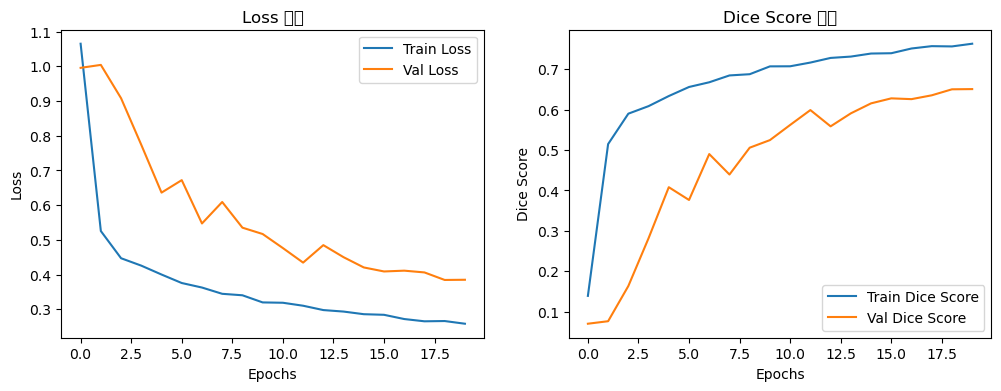

In [21]:
import matplotlib.pyplot as plt

# ÌïôÏäµ Î°úÍ∑∏ÏóêÏÑú loss & dice score Í∞ÄÏ†∏Ïò§Í∏∞
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_dice = history.history['dice_coefficient']
val_dice = history.history['val_dice_coefficient']

# Loss Í∑∏ÎûòÌîÑ
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Î≥ÄÌôî")

# Dice Score Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
plt.plot(train_dice, label="Train Dice Score")
plt.plot(val_dice, label="Val Dice Score")
plt.xlabel("Epochs")
plt.ylabel("Dice Score")
plt.legend()
plt.title("Dice Score Î≥ÄÌôî")

plt.show()

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc("font", family="Malgun Gothic")  # WindowsÏùò Í≤ΩÏö∞
# plt.rc("font", family="AppleGothic")  # MacÏùò Í≤ΩÏö∞

# ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams["axes.unicode_minus"] = False

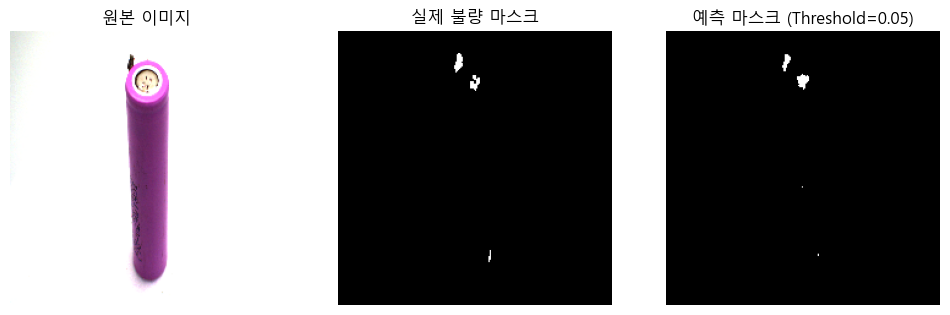

In [25]:
import matplotlib.pyplot as plt

# ÎûúÎç§ ÏÉòÌîå ÏÑ†ÌÉù
idx = np.random.randint(0, len(X_test))
image = X_test[idx]
true_mask = Y_test[idx].squeeze()
pred_mask = predictions_binary[idx].squeeze()

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(true_mask, cmap="gray")
plt.title("Ïã§Ï†ú Î∂àÎüâ ÎßàÏä§ÌÅ¨")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(pred_mask, cmap="gray")
plt.title(f"ÏòàÏ∏° ÎßàÏä§ÌÅ¨ (Threshold={threshold})")
plt.axis("off")

plt.show()   

In [62]:
import numpy as np
from tensorflow.keras.models import load_model

# HDF5 Î™®Îç∏ Î°úÎìú
model = load_model("final_unet_model.h5", compile=False)

# ÏòàÏ∏° ÏàòÌñâ (X_test Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©)
predictions = model.predict(X_test)

# Threshold Ï†ÅÏö© (0.04ÏÇ¨Ïö©)
threshold = 0.04
predictions_binary = (predictions > threshold).astype(np.uint8)

# ÌÅ¨Í∏∞ Îã§Ïãú ÌôïÏù∏
print(f"Y_test.shape: {Y_test.shape}")  # (188, 224, 224)
print(f"predictions_binary.shape: {predictions_binary.shape}")  # (188, 224, 224, 1)

# IoU (Intersection over Union) Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union if union != 0 else 0

# Dice Score Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_dice(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    return (2. * intersection) / (y_true.sum() + y_pred.sum()) if (y_true.sum() + y_pred.sum()) != 0 else 0

# Ï†ÑÏ≤¥ ÌÖåÏä§Ìä∏ÏÖãÏóê ÎåÄÌïú ÏÑ±Îä• ÌèâÍ∞Ä
ious, dices = [], []
for i in range(len(Y_test)):
    iou_score = compute_iou(Y_test[i].squeeze(), predictions_binary[i].squeeze())
    dice_score = compute_dice(Y_test[i].squeeze(), predictions_binary[i].squeeze())
    ious.append(iou_score)
    dices.append(dice_score)

# ÌèâÍ∑† IoU & Dice Score Ï∂úÎ†•
print(f"ÌèâÍ∑† IoU Score: {np.mean(ious):.4f}")
print(f"ÌèâÍ∑† Dice Score: {np.mean(dices):.4f}")

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 925ms/step
Y_test.shape: (188, 224, 224)
predictions_binary.shape: (188, 224, 224, 1)
ÌèâÍ∑† IoU Score: 0.3964
ÌèâÍ∑† Dice Score: 0.5331


In [61]:
import numpy as np
from tensorflow.keras.models import load_model

# HDF5 Î™®Îç∏ Î°úÎìú
model = load_model("final_unet_model.h5", compile=False)

# IoU Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union if union != 0 else 0

# Dice Score Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_dice(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    return (2. * intersection) / (y_true.sum() + y_pred.sum()) if (y_true.sum() + y_pred.sum()) != 0 else 0

# ÏòàÏ∏° ÏàòÌñâ
predictions = model.predict(X_test)

# Ïó¨Îü¨ Threshold Í∞íÏùÑ ÌÖåÏä§Ìä∏
best_threshold = 0
best_dice = 0

for t in np.arange(0.03, 0.1, 0.005):  # 0.03 ~ 0.1ÍπåÏßÄ 0.005 Îã®ÏúÑÎ°ú ÌÖåÏä§Ìä∏
    predictions_binary = (predictions > t).astype(np.uint8)
    
    dices = [compute_dice(Y_test[i].squeeze(), predictions_binary[i].squeeze()) for i in range(len(Y_test))]
    mean_dice = np.mean(dices)

    print(f"Threshold={t:.3f}: ÌèâÍ∑† Dice Score = {mean_dice:.4f}")

    if mean_dice > best_dice:
        best_dice = mean_dice
        best_threshold = t

# ÏµúÏ†Å Threshold Ï∂úÎ†•
print(f"\nÏµúÏ†Å Threshold: {best_threshold:.5f}, ÏµúÍ≥† Dice Score: {best_dice:.4f}")

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 955ms/step
Threshold=0.030: ÌèâÍ∑† Dice Score = 0.5330
Threshold=0.035: ÌèâÍ∑† Dice Score = 0.5329
Threshold=0.040: ÌèâÍ∑† Dice Score = 0.5331
Threshold=0.045: ÌèâÍ∑† Dice Score = 0.5328
Threshold=0.050: ÌèâÍ∑† Dice Score = 0.5324
Threshold=0.055: ÌèâÍ∑† Dice Score = 0.5320
Threshold=0.060: ÌèâÍ∑† Dice Score = 0.5321
Threshold=0.065: ÌèâÍ∑† Dice Score = 0.5319
Threshold=0.070: ÌèâÍ∑† Dice Score = 0.5316
Threshold=0.075: ÌèâÍ∑† Dice Score = 0.5312
Threshold=0.080: ÌèâÍ∑† Dice Score = 0.5310
Threshold=0.085: ÌèâÍ∑† Dice Score = 0.5305
Threshold=0.090: ÌèâÍ∑† Dice Score = 0.5301
Threshold=0.095: ÌèâÍ∑† Dice Score = 0.5296
Threshold=0.100: ÌèâÍ∑† Dice Score = 0.5293

ÏµúÏ†Å Threshold: 0.04000, ÏµúÍ≥† Dice Score: 0.5331


In [56]:
# ÏòàÏ∏°Í∞í ÌÅ¨Í∏∞ ÌôïÏù∏
print(f"predictions.shape: {predictions.shape}")  
print(f"Y_test.shape: {Y_test.shape}")  

predictions.shape: (188, 224, 224, 1)
Y_test.shape: (188, 224, 224)


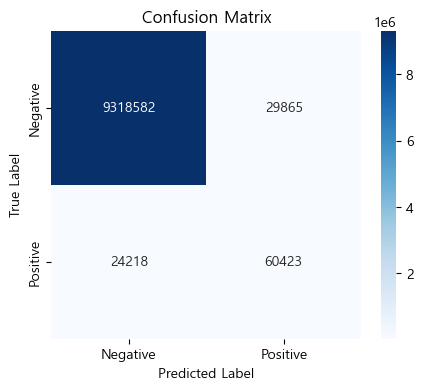

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Ï∞®Ïõê Î≥ÄÍ≤Ω
y_true_flat = Y_test.reshape(-1)  # Ï†ïÎãµ Îç∞Ïù¥ÌÑ∞ (Flatten)
y_pred_flat = predictions_binary.reshape(-1)  # ÏòàÏ∏° Îç∞Ïù¥ÌÑ∞ (Flatten)

# ÌòºÎèô ÌñâÎ†¨ Í≥ÑÏÇ∞
cm = confusion_matrix(y_true_flat, y_pred_flat)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [24]:
print(model.summary())  # ÌòÑÏû¨ Î∂àÎü¨Ïò® Î™®Îç∏ Íµ¨Ï°∞ ÌôïÏù∏

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)        ‚îÉ Output Shape      ‚îÉ    Param # ‚îÉ Connected to      ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer         ‚îÇ (None, 224, 224,  ‚îÇ          0 ‚îÇ -                 ‚îÇ
‚îÇ (InputLayer)        ‚îÇ 3)                ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Conv1 (Conv2D)      ‚îÇ (None, 112, 112,  ‚îÇ        864 ‚îÇ input_layer[0][0] ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ bn_Conv1            ‚îÇ (None, 112, 112,  ‚îÇ        128 ‚îÇ Conv1[0][0]       ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ Conv1_relu (ReLU)   ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ bn_Conv1[0][0]    ‚îÇ
‚îÇ                     ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        288 ‚îÇ Conv1_relu[0][0]  ‚îÇ
‚îÇ (DepthwiseConv2D)   ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        128 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_dept‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ          0 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (ReLU)              ‚îÇ 32)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_proj‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ        512 ‚îÇ expanded_conv_de‚Ä¶ ‚îÇ
‚îÇ (Conv2D)            ‚îÇ 16)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ expanded_conv_proj‚Ä¶ ‚îÇ (None, 112, 112,  ‚îÇ         64 ‚îÇ expanded_conv_pr‚Ä¶ ‚îÇ
‚îÇ (BatchNormalizatio‚Ä¶ ‚îÇ 16)               ‚îÇ            ‚îÇ                   ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 5,420,129 (20.68 MB)

 Trainable params: 5,386,241 (20.55 MB)

 Non-trainable params: 33,888 (132.38 KB)

None


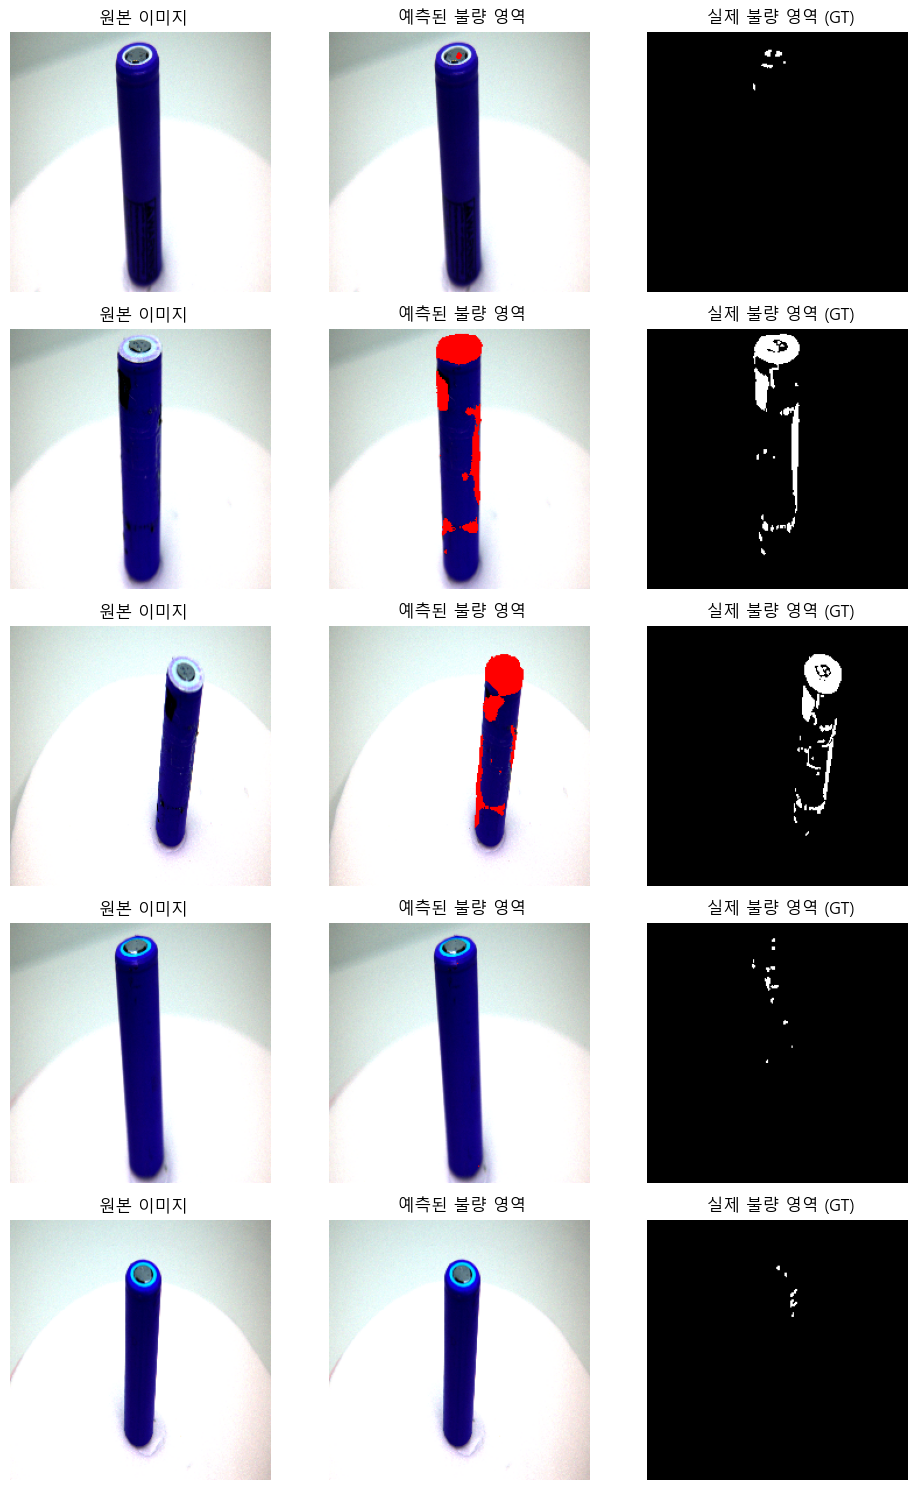

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ÏÉòÌîå Í∞úÏàò ÏÑ§Ï†ï (ÏµúÎåÄ 5Í∞ú)
num_samples = 5
X_samples = X_test[:num_samples]  # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ
Y_samples = Y_test[:num_samples]  # Ïã§Ï†ú Î∂àÎüâ ÎßàÏä§ÌÅ¨ (GT)
predictions_samples = predictions_binary[:num_samples]  # ÏòàÏ∏°Îêú ÎßàÏä§ÌÅ¨

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(num_samples, 3, figsize=(10, num_samples * 3))

for i in range(num_samples):
    original = (X_samples[i] * 255).astype(np.uint8)  # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ
    mask = predictions_samples[i].squeeze()  # ÏòàÏ∏°Îêú Î∂àÎüâ ÎßàÏä§ÌÅ¨
    gt_mask = Y_samples[i].squeeze()  # Ground Truth

    #  ÏõêÎ≥∏ ÏúÑÏóê ÏòàÏ∏° ÎßàÏä§ÌÅ¨ Ïò§Î≤ÑÎ†àÏù¥ (Îπ®Í∞ÑÏÉâÏúºÎ°ú ÏàòÏ†ï)
    overlay = original.copy()
    overlay[mask == 1] = [0, 0, 255]  # OpenCVÎäî BGR ÏÇ¨Ïö© ‚Üí Îπ®Í∞ÑÏÉâÏùÄ (0, 0, 255)

    # üîπ Plot (ÏõêÎ≥∏, ÏòàÏ∏°, GT ÎπÑÍµê)
    axes[i, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[i, 0].set_title(" ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ")
    
    axes[i, 1].imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    axes[i, 1].set_title(" ÏòàÏ∏°Îêú Î∂àÎüâ ÏòÅÏó≠")

    axes[i, 2].imshow(gt_mask, cmap="gray")
    axes[i, 2].set_title(" Ïã§Ï†ú Î∂àÎüâ ÏòÅÏó≠ (GT)")

    for ax in axes[i]:
        ax.axis("off")

plt.tight_layout()
plt.show()

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step


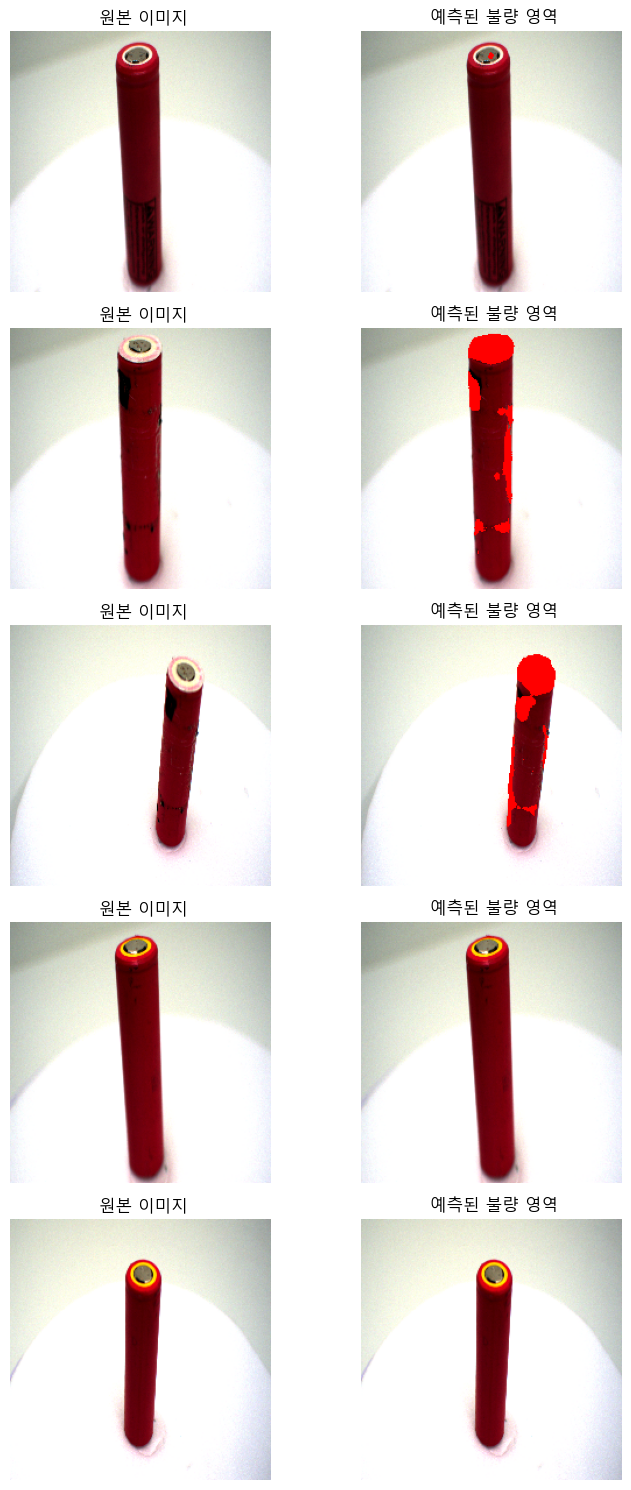

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import load_model

# Ïù¥ÎØ∏ÏßÄ Ìè¥Îçî Í≤ΩÎ°ú
image_dir = "C:/sample_ex3000/filtered_defect/test/images/"

# Î™®Îç∏ Î°úÎìú
model = load_model("final_unet_model.h5", compile=False)

# Threshold ÏÑ§Ï†ï
threshold = 0.04

# Ìè¥ÎçîÏóêÏÑú Ïù¥ÎØ∏ÏßÄ ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
num_samples = min(5, len(image_files))  # ÏµúÎåÄ 5Í∞úÎßå Î°úÎìú

X_samples = []
original_images = []

for img_file in image_files[:num_samples]:
    img_path = os.path.join(image_dir, img_file)
    original = cv2.imread(img_path)  # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Î°úÎìú
    original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # RGB Î≥ÄÌôò
    
    resized = cv2.resize(original, (224, 224))  # Î™®Îç∏ ÏûÖÎ†• ÌÅ¨Í∏∞Î°ú Î≥ÄÌôò
    X_samples.append(resized / 255.0)  # Ï†ïÍ∑úÌôî
    
    original_images.append(original)  # ÏõêÎ≥∏ Ï†ÄÏû•

X_samples = np.array(X_samples)

# Î™®Îç∏ ÏòàÏ∏° ÏàòÌñâ
predictions = model.predict(X_samples)
predictions_binary = (predictions > threshold).astype(np.uint8)  # Threshold Ï†ÅÏö©

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(num_samples, 2, figsize=(8, num_samples * 3))

for i in range(num_samples):
    original = original_images[i]  # ÏõêÎ≥∏ Î∞∞ÌÑ∞Î¶¨ Ïù¥ÎØ∏ÏßÄ
    mask = cv2.resize(predictions_binary[i].squeeze(), (original.shape[1], original.shape[0]))  # ÏõêÎ≥∏ ÌÅ¨Í∏∞Î°ú Î¶¨ÏÇ¨Ïù¥Ï¶à

    #  ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÏúÑÏóê ÏòàÏ∏° ÎßàÏä§ÌÅ¨ Ïò§Î≤ÑÎ†àÏù¥
    overlay = original.copy()
    overlay[mask == 1] = [255, 0, 0]  # Îπ®Í∞ÑÏÉâ(Î∂àÎüâ ÏòÅÏó≠ ÌëúÏãú)

    #  Plot (ÏõêÎ≥∏, ÏòàÏ∏° ÎπÑÍµê)
    axes[i, 0].imshow(original)
    axes[i, 0].set_title(" ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ")
    
    axes[i, 1].imshow(overlay)
    axes[i, 1].set_title(" ÏòàÏ∏°Îêú Î∂àÎüâ ÏòÅÏó≠")

    for ax in axes[i]:
        ax.axis("off")

plt.tight_layout()
plt.show()

In [75]:
from tensorflow.keras.models import load_model
import numpy as np

# ÏõêÎûò Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = load_model("final_unet_model.h5", compile=False)
print(" ÏõêÎûò Î™®Îç∏Î°ú Î≥µÏõê ÏôÑÎ£å!")


 ÏõêÎûò Î™®Îç∏Î°ú Î≥µÏõê ÏôÑÎ£å!


In [81]:
import numpy as np
from tensorflow.keras.models import load_model

# ‚úÖ Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = load_model("final_unet_model.h5", compile=False)

# ‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏° ÏàòÌñâ
predictions = model.predict(X_test)

# ‚úÖ ÌÖåÏä§Ìä∏Ìï† Threshold Î≤îÏúÑ ÏÑ§Ï†ï (0.40 ~ 0.80, 0.05 Í∞ÑÍ≤©)
thresholds = np.arange(0.01, 0.05, 0.003)

# ‚úÖ Dice Score Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏
dice_scores = []

# ‚úÖ Í∞Å ThresholdÏóê ÎåÄÌï¥ Dice Score Í≥ÑÏÇ∞
for threshold in thresholds:
    predictions_binary = (predictions > threshold).astype(np.uint8)
    
    dices = []
    for i in range(len(Y_test)):
        intersection = np.logical_and(Y_test[i].squeeze(), predictions_binary[i].squeeze()).sum()
        union = Y_test[i].sum() + predictions_binary[i].sum()
        dice_score = (2. * intersection) / union if union != 0 else 0
        dices.append(dice_score)
    
    mean_dice = np.mean(dices)
    dice_scores.append(mean_dice)
    print(f"Threshold={threshold:.3f} ‚Üí ÌèâÍ∑† Dice Score: {mean_dice:.4f}")

# ‚úÖ ÏµúÏ†Å Threshold Ï∞æÍ∏∞
best_idx = np.argmax(dice_scores)
best_threshold = thresholds[best_idx]
best_dice = dice_scores[best_idx]

print(f"\nÏµúÏ†Å Threshold: {best_threshold:.3f}, ÏµúÍ≥† Dice Score: {best_dice:.4f}")

6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 880ms/step
Threshold=0.010 ‚Üí ÌèâÍ∑† Dice Score: 0.5287
Threshold=0.015 ‚Üí ÌèâÍ∑† Dice Score: 0.5305
Threshold=0.020 ‚Üí ÌèâÍ∑† Dice Score: 0.5327
Threshold=0.025 ‚Üí ÌèâÍ∑† Dice Score: 0.5327
Threshold=0.030 ‚Üí ÌèâÍ∑† Dice Score: 0.5330
Threshold=0.035 ‚Üí ÌèâÍ∑† Dice Score: 0.5329
Threshold=0.040 ‚Üí ÌèâÍ∑† Dice Score: 0.5331
Threshold=0.045 ‚Üí ÌèâÍ∑† Dice Score: 0.5328

ÏµúÏ†Å Threshold: 0.040, ÏµúÍ≥† Dice Score: 0.5331


In [74]:
# ÏòàÏ∏° ÏàòÌñâ
predictions = model.predict(X_test)

# IoU (Intersection over Union) Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_iou(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union if union != 0 else 0

# Dice Score Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_dice(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    return (2. * intersection) / (y_true.sum() + y_pred.sum()) if (y_true.sum() + y_pred.sum()) != 0 else 0

# Í∏∞Ï°¥ ÏµúÏ†Å Threshold Ï†ÅÏö© (
threshold = 0.04
predictions_binary = (predictions > threshold).astype(np.uint8)

# Ï†ÑÏ≤¥ ÌÖåÏä§Ìä∏ÏÖã ÏÑ±Îä• ÌèâÍ∞Ä
ious, dices = [], []
for i in range(len(Y_test)):
    iou_score = compute_iou(Y_test[i].squeeze(), predictions_binary[i].squeeze())
    dice_score = compute_dice(Y_test[i].squeeze(), predictions_binary[i].squeeze())
    ious.append(iou_score)
    dices.append(dice_score)

# ÌèâÍ∑† IoU & Dice Score Ï∂úÎ†•
print(f"ÌèâÍ∑† IoU Score: {np.mean(ious):.4f}")
print(f" ÌèâÍ∑† Dice Score: {np.mean(dices):.4f}")


6/6 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 740ms/step
ÌèâÍ∑† IoU Score: 0.3964
 ÌèâÍ∑† Dice Score: 0.5331
